### Tratamento de Ruidos em Dados
- Definição
- Exploração
- Padronização
- Normalização

In [12]:
import pandas as pd
import numpy as np

Erros de medição

In [2]:
pesos_reais = [50, 50, 50, 50, 50]
erros_medicao = [0, -0.5, 1, -1.2, 0.8] #simular erro humano
pesos_com_erro = [pesos_reais[i] + erros_medicao[i] for i in range(5)]
print("\n Erros de mediçao - Pesagem de um objeto")
print("Pesos Reais: ", pesos_reais)
print("Pesos com Erro ", pesos_com_erro)


 Erros de mediçao - Pesagem de um objeto
Pesos Reais:  [50, 50, 50, 50, 50]
Pesos com Erro  [50, 49.5, 51, 48.8, 50.8]


Falha na coleta

In [3]:
notas = [8, 7, None, 9, None]
print("\n--- Falhas na Coleta de Dados ---")
print("Notas registradas:", notas)


--- Falhas na Coleta de Dados ---
Notas registradas: [8, 7, None, 9, None]


Outliers Extremos

In [4]:
idades = [22, 23, 24, 120, 25]
print("\n--- Outliers ---")
print("Idades do Grupo:", idades)


--- Outliers ---
Notas registradas: [22, 23, 24, 120, 25]


Inferencia externa

In [5]:
temperaturas = [22, 23, 30, 22, 21, 50, 22]
print("\n--- Inferencia Externa ---")
print("Temperaturas:", idades)


--- Inferencia Externa ---
Temperaturas: [22, 23, 24, 120, 25]


Gerando dados com ruidos

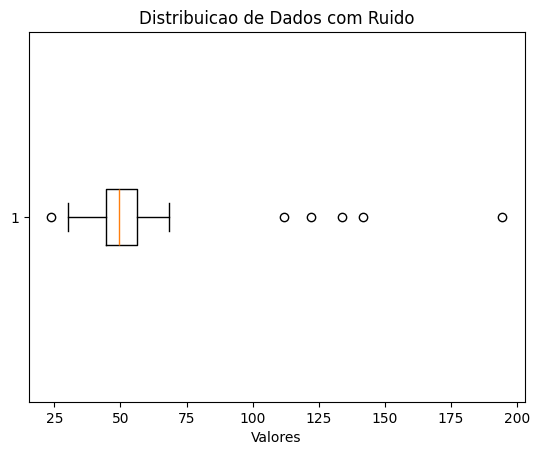

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Gerar dados normais
np.random.seed(42)
dados_limpos = np.random.normal(loc=50, scale=10, size=100)
#Gera 100 numeros aleatorios de uma distribuicao normal com media 50 e desvio padrao 10

ruidos = np.random.uniform(low=100, high=200, size=5)
#Gera 5 numeros aleatorios de uma distribuicao uniforme entre 100 e 200

dados_com_ruido = np.concatenate([dados_limpos, ruidos])

#Visualizar os dados
plt.boxplot(dados_com_ruido, vert=False)
plt.title("Distribuicao de Dados com Ruido")
plt.xlabel("Valores")
plt.show()

Implemente uma funcao para identificar outliers com o metodo do intervalo interquartil (IRQ)

In [14]:
def detectar_outliers_iqr(dados):
    Q1 = np.percentile(dados, 25) # Primeiro quartil, valor abaixo do qual 25% dos dados estão
    Q3 = np.percentile(dados, 75) # Terceiro quartil, valor abaixo do qual 75% dos dados estão
    IQR = Q3 - Q1 #Calculo do IQR, que é a diferenca entre Q3 e Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return [x for x in dados if x < limite_inferior or x > limite_superior]

outiliers = detectar_outliers_iqr(dados_com_ruido)
print("Outliers encontrados:", outiliers)

Outliers encontrados: [23.802548959102555, 141.74110031487788, 122.21078104707303, 111.98653673336828, 133.7615171403628, 194.2909703912519]


Exploracao de Dados

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
dados = np.random.normal(loc=50, scale=10, size=100)

print("\n--- Estatisticas Descritivas ---")
df = pd.DataFrame(dados, columns=["Valores"])
print(df.describe()) # Exibe estatisticas como media, desvio padrao, min, max, quartis


--- Estatisticas Descritivas ---
          Valores
count  100.000000
mean    48.961535
std      9.081684
min     23.802549
25%     43.990943
50%     48.730437
75%     54.059521
max     68.522782


Visualizacao da distribuicao

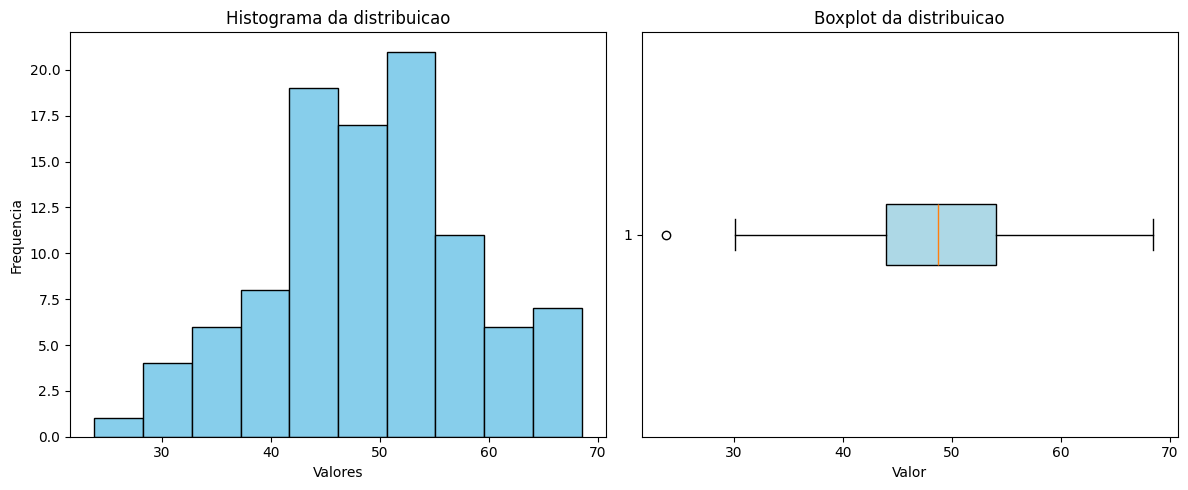

In [18]:
#Hstograma
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.hist(dados, bins=10, color="skyblue", edgecolor="black")
plt.title("Histograma da distribuicao")
plt.xlabel("Valores")
plt.ylabel("Frequencia")

#Boxplot
plt.subplot(1,2,2)
plt.boxplot(dados, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot da distribuicao")
plt.xlabel("Valor")
plt.tight_layout()
plt.show()

Prática: Estatisticas descritivas e visualização


--- Estatisticas Descritivas ---
          Valores
count  105.000000
mean    53.334708
std     22.449616
min     23.802549
25%     44.377125
50%     49.641740
75%     56.116763
max    194.290970


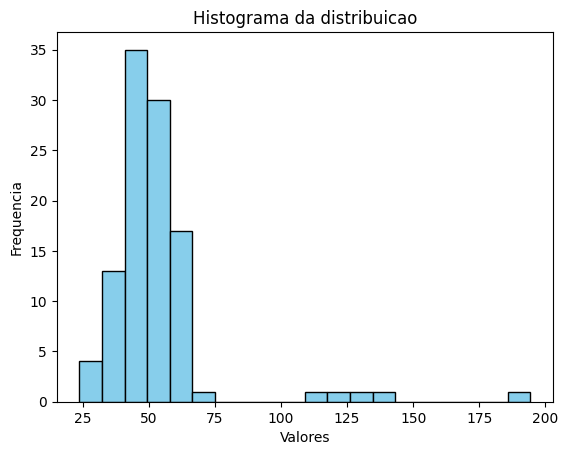

In [19]:
import pandas as pd

df = pd.DataFrame(dados_com_ruido, columns=["Valores"])
print("\n--- Estatisticas Descritivas ---")
print(df.describe()) #Exibe estatisticas como media, desvio padrao, min, max, quartis

#Histograma
plt.hist(df["Valores"], bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma da distribuicao")
plt.xlabel("Valores")
plt.ylabel("Frequencia")
plt.show()

In [20]:
from scipy.stats import zscore

def detectar_outliers_iqr_zscore(dados, limiar=3): #dados = array com numeros
                                                   #Limiar = valor limite para identificar outliers
    z_scores = np.abs(zscore(dados))
    return dados[z_scores > limiar]

outiliers_z = detectar_outliers_iqr_zscore(df["Valores"])
print("Outliers encontrados:", outiliers_z.tolist())

Outliers encontrados: [141.74110031487788, 122.21078104707303, 133.7615171403628, 194.2909703912519]


Padronização

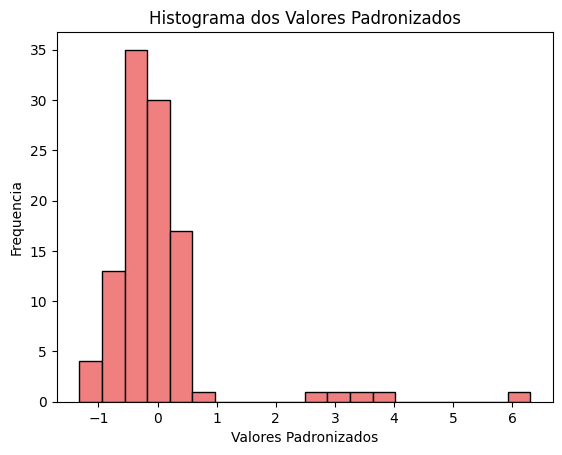

In [24]:
from scipy.stats import zscore

df["Padronizado"] = zscore(df["Valores"])
plt.hist(df["Padronizado"], bins=20, color="lightcoral", edgecolor="black")
plt.xlabel("Valores Padronizados")
plt.ylabel("Frequencia")
plt.title("Histograma dos Valores Padronizados")
plt.show()

Normalização transforma os dados para um intervalo [0,1][0,1]

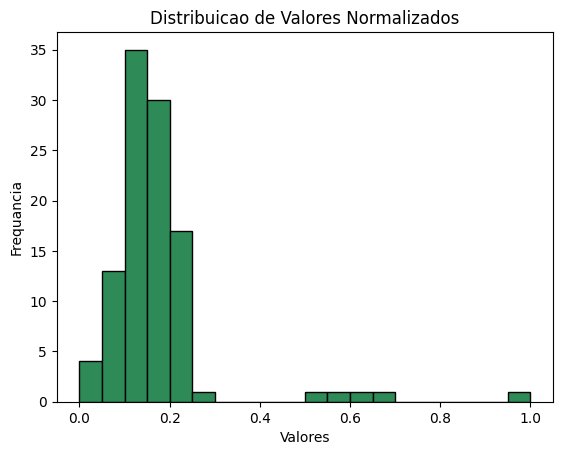

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["Normalizado"] = scaler.fit_transform(df[["Valores"]])

plt.hist(df["Normalizado"], bins=20, color="seagreen", edgecolor="black")
plt.xlabel("Valores")
plt.ylabel("Frequancia")
plt.title("Distribuicao de Valores Normalizados")
plt.show()


In [27]:
def normalizar_dados(dados, min_val=0, max_val=1):
    dados_normalizados = (dados - min(dados)) / (max(dados) - min(dados))
    dados_normalizados = dados_normalizados * (max_val - min_val) + min_val
    return dados_normalizados
dados_normalizados = normalizar_dados(df["Valores"])
print(dados_normalizados)

0      0.182796
1      0.145551
2      0.191651
3      0.242995
4      0.139927
         ...   
100    0.691769
101    0.577214
102    0.517243
103    0.644964
104    1.000000
Name: Valores, Length: 105, dtype: float64
